In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns


In [2]:
n = 500

In [3]:
temp = np.random.binomial(1, 0.3, n)

In [4]:
X_1 = np.random.normal(1,1, sum(temp))
X_2 = np.random.normal(5, 2, n - sum(temp))

In [5]:
X = np.concatenate([X_1, X_2])
y = [0] * sum(temp) + [1]*(n-sum(temp))

(array([ 1.,  2.,  3.,  9., 14., 24., 27., 26., 29., 24., 25., 32., 24.,
        18., 32., 30., 30., 35., 27., 35., 21.,  6.,  9.,  5.,  4.,  3.,
         1.,  2.,  0.,  2.]),
 array([-1.99244727, -1.53944218, -1.08643708, -0.63343199, -0.18042689,
         0.27257821,  0.7255833 ,  1.1785884 ,  1.63159349,  2.08459859,
         2.53760369,  2.99060878,  3.44361388,  3.89661897,  4.34962407,
         4.80262917,  5.25563426,  5.70863936,  6.16164446,  6.61464955,
         7.06765465,  7.52065974,  7.97366484,  8.42666994,  8.87967503,
         9.33268013,  9.78568522, 10.23869032, 10.69169542, 11.14470051,
        11.59770561]),
 <BarContainer object of 30 artists>)

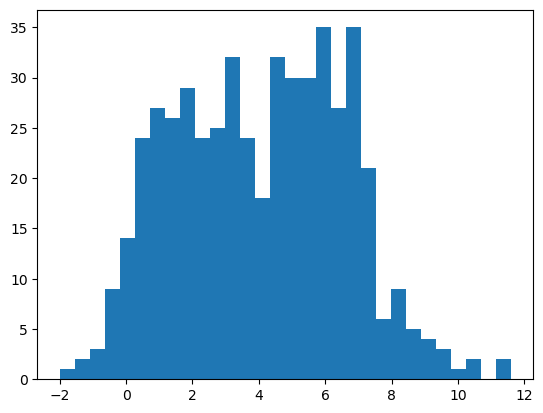

In [6]:
plt.hist(X, bins=30)

<h2>b)</h2>

<h2>c)</h2>

In [7]:
pi0 = 0.3
pi1 = 0.7

In [8]:
gamma = pi1 * scipy.stats.norm(5, np.sqrt(2)).pdf(X) / (pi0 * scipy.stats.norm(1, 1).pdf(X) + pi1 * scipy.stats.norm(5, np.sqrt(2)).pdf(X))

<h2>d)</h2>

In [9]:
mju0 = sum((1-gamma)*X)/sum(1-gamma)
mju1 = sum((gamma)*X)/sum(gamma)
sigma0 = sum((1-gamma)*(X - mju0)**2) / sum(1-gamma)
sigma1 = sum((gamma)*(X- mju1)**2) / sum(gamma) 

In [10]:
mju0 = 1
mju1 = 5
sigma0 = 1
sigma1 = np.sqrt(2)
p0 = 0.5
p1 = 0.5
loglik_array = []
for i in range(100):
    gamma = pi1 * scipy.stats.norm(mju1, sigma1).pdf(X) / ((1-pi1) * scipy.stats.norm(mju0, sigma0).pdf(X) + pi1 * scipy.stats.norm(mju1, sigma1).pdf(X))
    mju0 = sum((1-gamma)*X)/sum(1-gamma)
    mju1 = sum((gamma)*X)/sum(gamma)
    sigma0 = np.sqrt(sum((1-gamma)*(X - mju0)**2) / sum(1-gamma))
    sigma1 = np.sqrt(sum((gamma)*(X- mju1)**2) / sum(gamma)) 
    pi1 = np.mean(gamma)
    loglik = sum((1-gamma) * (np.log(scipy.stats.norm(mju0, sigma0).pdf(X)) + np.log(1-pi1))) + sum((gamma) * (np.log(scipy.stats.norm(mju1, sigma1).pdf(X)) + np.log(pi1)))
    loglik_array.append(-loglik)
    if ((i > 5) and (abs(loglik_array[-1] - loglik_array[-2]) < 1e-3)):
        break

In [11]:
loglik_array[-1]

1268.552967317009

In [12]:
print(f'mju0: {mju0}, mju1: {mju1}, sigma0: {sigma0}, sigma1: {sigma1}, pi0: {1-pi1}, pi1: {pi1}')

mju0: 1.373061395803544, mju1: 5.391736885439442, sigma0: 1.1842178656659, sigma1: 1.8906808956666128, pi0: 0.3363902455643366, pi1: 0.6636097544356634


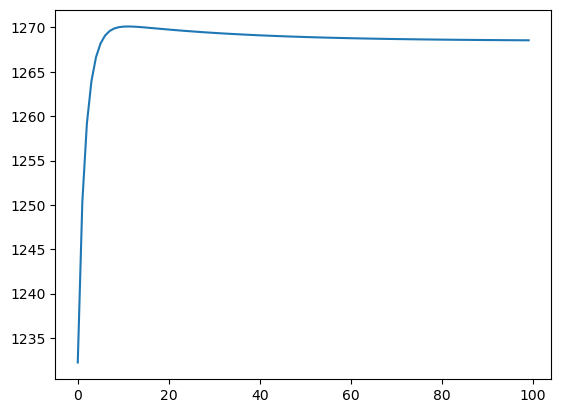

In [13]:
plt.plot(loglik_array)

In [16]:
temp = np.random.binomial(1, pi0, n)
X_1_2 = np.random.normal(mju0,sigma0, sum(temp))
X_2_2 = np.random.normal(mju1, sigma1, n - sum(temp))
X_2 = np.concatenate([X_1_2, X_2_2])

C:\Users\szmadej\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\szmadej\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

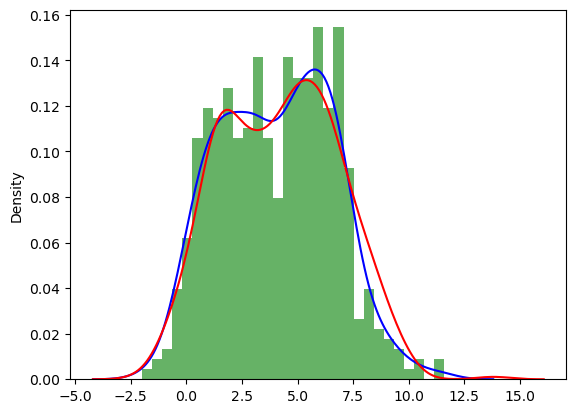

In [17]:
plt.hist(X, bins=30, density=True, alpha=0.6, color='g')
sns.kdeplot(X, color='b')
sns.kdeplot(X_2, color='r')